In [3]:
import numpy as np
import pandas as pd
import string

import matplotlib.pyplot as plt
import seaborn as sns

import ipywidgets
from ipywidgets import interact

plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('fivethirtyeight')

In [4]:
#reading the datastet
data = pd.read_csv('drugsComTest_raw.csv')
print("The Shape of the Dataset :", data.shape)

The Shape of the Dataset : (53766, 7)


In [5]:
data.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4


In [6]:
print("Number of Unique Drugs present in the Dataset :", data['drugName'].nunique())
print("Number of Unique Medical Conditions present in the Dataset :", data['condition'].nunique())

print("\nThe Time Period of Collecting the Data")
print("Starting Date :", data['date'].min())
print("Ending Date :", data['date'].max())

Number of Unique Drugs present in the Dataset : 2637
Number of Unique Medical Conditions present in the Dataset : 708

The Time Period of Collecting the Data
Starting Date : 1-Apr-08
Ending Date : 9-Sep-17


In [7]:
data[['rating','usefulCount']].describe() #std deviation measurement of uncertainity

,rating,usefulCount
count,53766.000000,53766.000000
mean,6.976900,27.989752
std,3.285207,36.172833
min,1.000000,0.000000
25%,4.000000,6.000000
50%,8.000000,16.000000
75%,10.000000,36.000000
max,10.000000,949.000000


In [8]:
print("Analysis on Useless Drugs")
print("----------------------------")
print("The Number of Drugs with No Useful Count :", data[data['usefulCount'] == 0].count()[0])


print("Number of Good Drugs with Lesser Useful Count :", data[(data['usefulCount'] == 0) &
                                                data['rating'] >= 8].count()[0])


print("Average Rating of Drugs with No Useful Count : {0:.2f}".format(data[data['usefulCount'] == 0]['rating'].mean()))

print("\nAnalysis on Useful Drugs")
print("----------------------------")
print("The Number of Drugs with Greater than 1000 Useful Counts :", data[data['usefulCount'] > 1000].count()[0])
print("Average Rating of Drugs with 1000+ Useful Counts :", data[data['usefulCount'] > 1000]['rating'].mean())
print("\nName and Condition of these Drugs: \n\n", 
    data[data['usefulCount'] > 1000][['drugName','condition']].reset_index(drop = True))

Analysis on Useless Drugs
----------------------------
The Number of Drugs with No Useful Count : 2084
Number of Good Drugs with Lesser Useful Count : 0
Average Rating of Drugs with No Useful Count : 5.87

Analysis on Useful Drugs
----------------------------
The Number of Drugs with Greater than 1000 Useful Counts : 0
Average Rating of Drugs with 1000+ Useful Counts : nan

Name and Condition of these Drugs: 

 Empty DataFrame
Columns: [drugName, condition]
Index: []


In [9]:
data[['drugName','condition','review']].describe(include = 'object') #statistical summary

,drugName,condition,review
count,53766,53471,53766
unique,2637,708,48280
top,Levonorgestrel,Birth Control,"""Good."""
freq,1273,9648,8


In [10]:
data.isnull().sum() #checking missing values

uniqueID         0
drugName         0
condition      295
review           0
rating           0
date             0
usefulCount      0
dtype: int64

In [11]:
data = data.dropna() #dropping the missing valuyes
data.isnull().sum().sum() #updating the checking of missing values 

0

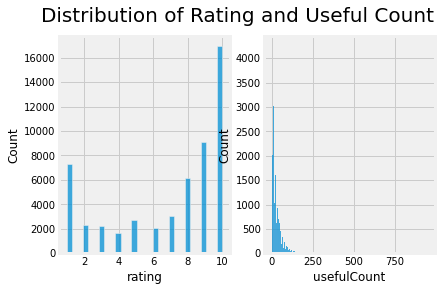

In [12]:
plt.rcParams['figure.figsize'] = (15, 5) #distribution of the rating and useful count

plt.subplot(1, 2, 1)
sns.histplot(data['rating'])

plt.subplot(1, 2, 2)
sns.histplot(data['usefulCount'])

plt.suptitle('Distribution of Rating and Useful Count \n ', fontsize = 20)
plt.show()

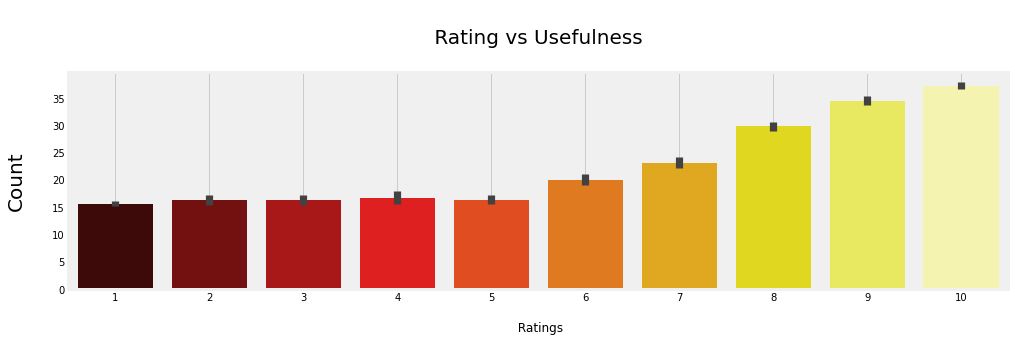

In [13]:
#impact of ratings
plt.rcParams['figure.figsize'] = (15, 4)
sns.barplot(x = data['rating'], y = data['usefulCount'], palette = 'hot')
plt.grid()
plt.xlabel('\n Ratings')
plt.ylabel('Count\n', fontsize = 20)
plt.title('\n Rating vs Usefulness \n', fontsize = 20)
plt.show() #shows positive linear relationship between the rating and the useful count column
            #no. of avg useful count is increasing as the rating is increasing

In [14]:
data['len']  = data['review'].apply(len) #understanding the impact of length of review, basically 
#determing whether longer reviews produce good/positve rating. So we create new column len and calculate 
#the length of reviews and insert inside the column

In [15]:
data[['rating','len']].groupby(['rating']).agg(['min','mean','max'])# checking impact of length of reviews on 
#ratings

len                  
       min        mean   max
rating                      
1        5  427.267447  3103
2       14  458.453959  2376
3        8  449.259445  2142
4        5  468.612667  1558
5       10  480.199926  2010
6        4  471.655566  2202
7        6  482.972358  1266
8        6  479.849134  1603
9        3  476.221930  2733
10       6  445.299994  6192

In [16]:
print("Length of Longest Review", data['len'].max()) #highest length review from above observation no.2
data['review'][data['len'] == data['len'].max()].iloc[0] 

Length of Longest Review 6192


'"I don&rsquo;t find a lot of positive stories about antidepressants, or I find stories where people are taking the antidepressant the wrong way.\r\n\r\nI wanted to share my experience.  A positive one.\r\n\r\nI&rsquo;ve had generalized anxiety disorder, SEVERE OCD, and panic disorder for as long as I can remember.  My first memory of having an episode was when I was 4 years old at my kindergarten interview.  I feel as though I was born with the illnesses mentioned above, right from the womb.  When I was a child I was extremely anxious, had bad separation anxiety from my parents and had extreme OCD, I was just a kid and thought that the way I was feeling is how all kids felt, I didn&rsquo;t realize that I was different.  This went on, and got even worse in middle school.  I began developing trichtilomania in middle school.  In high school I went from being a 90% above student, to failing every class within a couple of years.  I couldn&rsquo;t leave the house.  My panic disorder and gad

In [17]:
def punctuation_removal(messy_str):
    clean_list = [char for char in messy_str if char not in string.punctuation] #finding punctuations in the data using string library
    clean_str = ''.join(clean_list)
    return clean_str

data['review'] = data['review'].apply(punctuation_removal) #removing the punctuations as they have no
#sentimental meanings for a better textual analysis 

In [18]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop = stopwords.words('english')
stop.append("i'm") #adding a new word to the stop word list

stop_words = []

for item in stop: 
    new_item = punctuation_removal(item)
    stop_words.append(new_item) 

def stopwords_removal(messy_str):
    messy_str = word_tokenize(messy_str)
    return [word.lower() for word in messy_str 
            if word.lower() not in stop_words ]

data['review'] = data['review'].apply(stopwords_removal)

In [19]:
import re
def drop_numbers(list_text):
    list_text_new = []
    for i in list_text:
        if not re.search('\d', i):
            list_text_new.append(i)
    return ' '.join(list_text_new)

data['review'] = data['review'].apply(drop_numbers) #removing numbers from the reviews 

In [20]:
import textblob
from textblob import TextBlob

In [21]:
def get_polarity(text):
    textblob = TextBlob(str(text.encode('utf-8')))
    pol = textblob.sentiment.polarity
    return pol

# lets apply the function
data['polarity'] = data['review'].apply(get_polarity)

In [22]:
# Lets calculate the Subjectvity of the Reviews
def get_subjectivity(text):
    textblob = TextBlob(str(text.encode('utf-8')))
    subj = textblob.sentiment.subjectivity
    return subj

# lets apply the Function
data['subjectivity'] = data['review'].apply(get_subjectivity)

In [23]:
data[['len','polarity','subjectivity']].describe()

,len,polarity,subjectivity
count,53471.000000,53471.000000,53471.000000
mean,458.486189,0.066074,0.488965
std,237.590514,0.236213,0.185508
min,3.000000,-1.000000,0.000000
25%,262.000000,-0.050000,0.395578
50%,458.000000,0.057143,0.500000
75%,690.000000,0.186667,0.600000
max,6192.000000,1.000000,1.000000


In [24]:
data['polarity']

0       -0.300000
1        0.650000
2        0.333333
3        0.253125
4        0.239804
           ...   
53761   -0.036111
53762    0.095358
53763   -0.057522
53764    0.000000
53765    0.000000
Name: polarity, Length: 53471, dtype: float64

In [26]:
min_rating = data['rating'].min() #calculating min and max rating
max_rating = data['rating'].max()

def scale_rating(rating):
    rating -= min_rating #deducting min rating from all ratings
    rating = rating/(max_rating -1) #dividing new update rating with (rating -1)
    rating *= 5     ##multiplying rating by 5 and can be treated as the threshold
    rating = int(round(rating,0))
    
    if(int(rating) == 0 or int(rating)==1 or int(rating)==2):
        return 0 #if score comes out to be 0,1,2 the eff score will be 0
    else:
        return 1 #otherwise it will be one
    
data['eff_score'] = data['rating'].apply(scale_rating)

In [27]:
data['eff_score']

0        1
1        1
2        1
3        1
4        1
        ..
53761    1
53762    1
53763    1
53764    0
53765    1
Name: eff_score, Length: 53471, dtype: int64

In [28]:
data['usefulness'] = (data['polarity']*data['subjectivity'])*100
(round(data['usefulness']))

0       -16.0
1        49.0
2        17.0
3        15.0
4        13.0
         ... 
53761    -1.0
53762     5.0
53763    -3.0
53764     0.0
53765     0.0
Name: usefulness, Length: 53471, dtype: float64

In [29]:
data[['drugName','condition','usefulness']][data['usefulness'] > 
                            data['usefulness'].mean()].sort_values(by = 'usefulness', 
                                        ascending = False).head(10).reset_index(drop = True)

,drugName,condition,usefulness
0,Amitriptyline,Migraine Prevention,100.0
1,Clonazepam,Anxiety,100.0
2,Dulaglutide,"Diabetes, Type 2",100.0
3,Equetro,Bipolar Disorde,100.0
4,OnabotulinumtoxinA,Migraine,100.0
5,Bactrim DS,Acne,100.0
6,Gonal-f,llicle Stimulation,100.0
7,Mycolog II,Cutaneous Candidiasis,100.0
8,Lantus,"Diabetes, Type 2",100.0
9,Glipizide,"Diabetes, Type 2",100.0


In [30]:
@interact
def check(condition = list(data['condition'].value_counts().index)):
    return data[data['condition'] == condition]['eff_score'].value_counts() #analysing the medical conditions for usefulness
#finding out useful and useless drugs for each on condition

interactive(children=(Dropdown(description='condition', options=('Birth Control', 'Depression', 'Pain', 'Anxie…

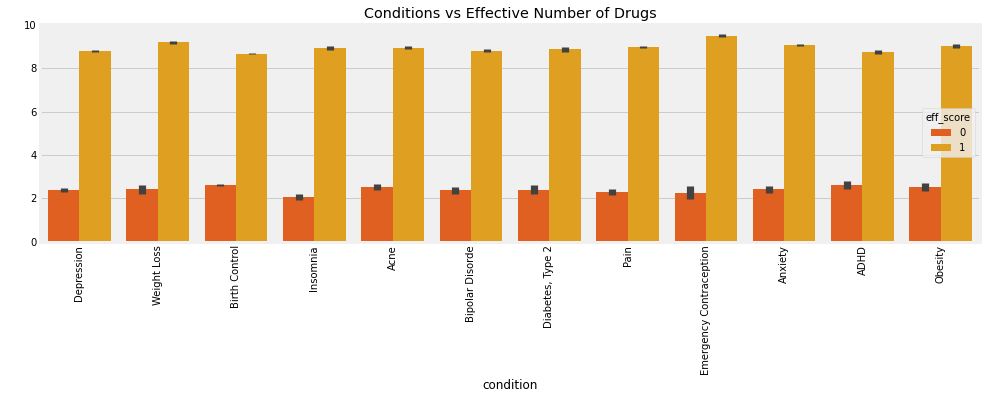

In [31]:
popular_conditions = ('Birth Control','Depression','Pain','Anxiety','Acne','Bipolar Disorde','Insomnia','Weight Loss',
                      'Obesity','ADHD', 'Diabetes, Type 2', 'Emergency Contraception','Migrane')
conditions = data.loc[data['condition'].isin(popular_conditions)]

sns.barplot( x=  conditions['condition'],  y =conditions['rating'], hue = data['eff_score'], 
     palette = 'autumn')
plt.title('Conditions vs Effective Number of Drugs')
plt.xticks(rotation = 90)
plt.ylabel(' ')
plt.show()

In [32]:
print("Number of Unique Conditions :", data['condition'].nunique())
data['condition'].value_counts().head(10)

Number of Unique Conditions : 708


Birth Control      9648
Depression         3095
Pain               2100
Anxiety            1908
Acne               1847
Bipolar Disorde    1380
Weight Loss        1248
Insomnia           1231
Obesity            1189
ADHD               1126
Name: condition, dtype: int64

In [33]:
data[['drugName','usefulCount']][data['usefulCount'] >
                    data['usefulCount'].mean()].sort_values(by = 'usefulCount',
                                        ascending = False).head(10).reset_index(drop = True)

,drugName,usefulCount
0,Sertraline,949
1,Etonogestrel,730
2,OxyContin,695
3,Oxycodone,695
4,Sertraline,680
5,Sertraline,644
6,Cymbalta,621
7,Buspirone,585
8,Citalopram,559
9,Vilazodone,513


In [34]:
data = data.drop_duplicates()

In [35]:
@interact
def high_low_rate(condition = list(data['condition'].value_counts().index)):
    print("\n Top 5 Drugs")
    print(data[data['condition'] == condition][['drugName','usefulness']].sort_values(by = 'usefulness',
                                                 ascending = False).head().reset_index(drop = True))
    print("\n\n Bottom 5 Drugs")
    print(data[data['condition'] == condition][['drugName','usefulness']].sort_values(by = 'usefulness',
                                                 ascending = True).head().reset_index(drop = True))

interactive(children=(Dropdown(description='condition', options=('Birth Control', 'Depression', 'Pain', 'Anxie…